# Keras Tutorial

### Emotion Detection in Images of Faces

#### load packages:

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import (
    Input, Dense, Activation, ZeroPadding2D, BatchNormalization,
    Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
)
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.utils import plot_model, get_file, model_to_dot
import tensorflow.keras.backend as K
import pydot
from IPython.display import SVG
K.set_image_data_format('channels_last')

from matplotlib.pyplot import imshow
%matplotlib inline


In [7]:
import h5py
import numpy as np

def load_dataset():
    train_dataset = h5py.File('train_happy.h5', "r")
    test_dataset = h5py.File('test_happy.h5', "r")

    X_train_orig = np.array(train_dataset["train_set_x"][:])  # training set features
    Y_train_orig = np.array(train_dataset["train_set_y"][:])  # training set labels

    X_test_orig = np.array(test_dataset["test_set_x"][:])     # test set features
    Y_test_orig = np.array(test_dataset["test_set_y"][:])     # test set labels

    classes = np.array(test_dataset["list_classes"][:])       # list of classes (0–5)

    # reshape labels to (1, number of examples)
    Y_train_orig = Y_train_orig.reshape((1, Y_train_orig.shape[0]))
    Y_test_orig = Y_test_orig.reshape((1, Y_test_orig.shape[0]))

    return X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes


In [8]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()


y =  0


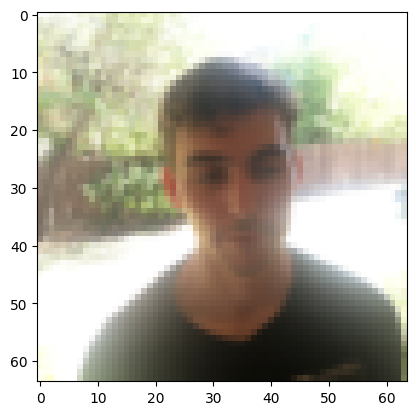

In [9]:
# let's check
idx = 7
imshow(X_train_orig[idx])
print("y = ", str(np.squeeze(Y_train_orig[:, idx])))

<!--  -->

In [10]:
x_train = X_train_orig/255.
x_test = X_test_orig/255.

y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print("number of training examples = " + str(x_train.shape[0]))
print("number of test examples = " + str(x_test.shape[0]))
print("X_train shape: " + str(x_train.shape))
print("Y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(x_test.shape))
print("Y_test shape: " + str(Y_test.shape))


number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


### 2. Building a model in keras

In [11]:
def model(input_shape):
    x_input = Input(input_shape)

    x = ZeroPadding2D((3, 3))(x_input) # pads the border of x_input with zeros

    x = Conv2D(32, (7, 7), strides= (1,1), name='conv0')(x)
    x = BatchNormalization(axis=3, name='bn0')(x)
    x = Activation('relu')(x)

    x = MaxPooling2D((2, 2), name='max_pool')(x)

    x = Flatten()(x)
    x = Dense(1, activation='sigmoid', name='fc')(x)

    model = Model(inputs = x_input, outputs=x, name='HappyModel')
    return model


In [12]:
def HappyModel(input_shape):
    x_input = Input(input_shape)

    x = ZeroPadding2D((3, 3))(x_input) # pads the border of x_input with zeros
    x = Conv2D(32, (7, 7), strides= (1,1), name='conv0')(x)
    x = BatchNormalization(axis=3, name='bn0')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), name='max_pool')(x)
    x = Flatten()(x)
    x = Dense(1, activation='sigmoid', name='fc')(x)

    model = Model(inputs = x_input, outputs=x, name='HappyModel')

    return model

##### **4 steps in keras to describe the model**
1. create model by calling the func.
2. compile the model by `model.compile(optimizer='...', loss='...', metrics=['accuracy'])`
3. train the model by `model.filt()`
4. test the model on test data by `model.evaluate()`

In [21]:
happyModel = HappyModel(x_train.shape[1:4])
happyModel.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
happyModel.fit(x_train, y_train, epochs = 20, batch_size = 50)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.5088 - loss: 3.5938
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.7020 - loss: 0.8856
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.8733 - loss: 0.2899
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.8820 - loss: 0.2536
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.9031 - loss: 0.2500
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.9363 - loss: 0.1791
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9630 - loss: 0.1004
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.9779 - loss: 0.0922
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.9725 - loss: 0.0897
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.9799 - loss: 0.0776
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.9328 - loss: 0.1583
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step

### 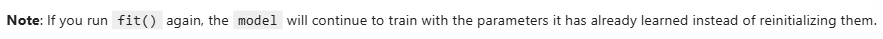

In [27]:
preds = happyModel.evaluate(x_test, Y_test)
print()
print("Loss = " + str(preds[0]))
print("Test Accuracy = " + str(preds[1]))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9528 - loss: 0.2018

Loss = 0.19809702038764954
Test Accuracy = 0.95333331823349


### 4. Test with my own image:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0.44920504]]


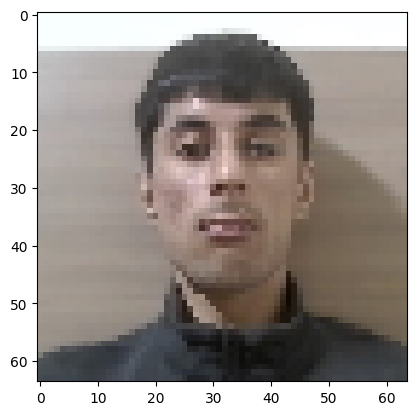

In [29]:
img_path = "profile_iamge_pic.jpg"
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.

print(happyModel.predict(x))

### Some additional features.

In [24]:
happyModel.summary()

Model: "HappyModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_2                │ (None, 70, 70, 3)      │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv0 (Conv2D)                  │ (None, 64, 64, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn0 (BatchNormalization)        │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool (MaxPooling2D)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc (Dense)                      │ (None, 1)              │        32,769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,773 (440.52 KB)

 Trainable params: 37,569 (146.75 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 75,140 (293.52 KB)

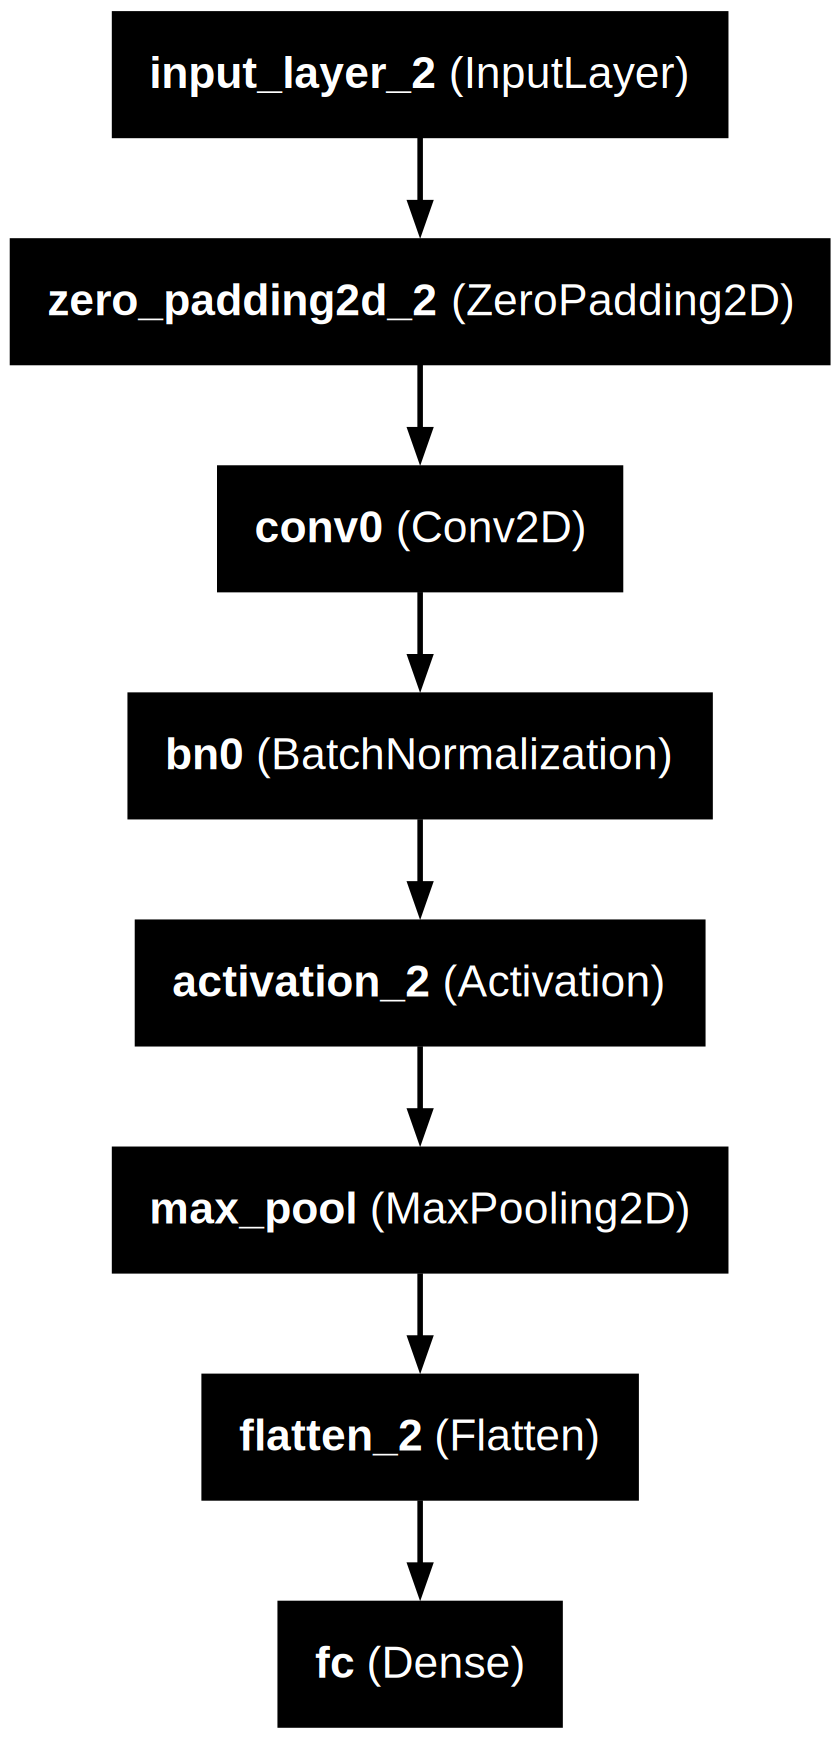

In [25]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))

In [26]:
!dot -V


dot - graphviz version 14.0.4 (20251115.1723)
